In [53]:
# 온도에 따른 오존량을 학습시켜 보자

# 필요한 modul을 불러들인다.
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# Raw Data Loading
df = pd.read_csv('./Data/ozone.csv')
display(df.head())

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [59]:
df = df[['Ozone','Temp']]
# 데이터 전처리를 실행해야 된다.
# 1. 제일 먼저 결측치 처리를 해야 한다.(지금은 그냥 삭제할꺼다.)
df = df.dropna(how='any')

display(df.head(),df.shape) #(116, 2)

,Ozone,Temp
0,41.0,67
1,36.0,72
2,12.0,74
3,18.0,62
5,28.0,66


(116, 2)

In [79]:
# Training Data Set

x_data = df['Temp'].values.reshape(-1,1) # x_data를 2차원으로 만들어야 한다. 
t_data = df['Ozone'].values.reshape(-1,1)

# 데이터 전처리!
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler() 
scaler_x.fit(x_data) # scaler_x에게 x x데이터가 가지고 있는 최대 최소값을 알려준다.
x_data_norm = scaler_x.transform(x_data)

scaler_t = MinMaxScaler() 
scaler_t.fit(t_data) # scaler_t에게 t데이터가 가지고 있는 최대 최소값을 알려준다.
t_data_norm = scaler_t.transform(t_data)

# Model
keras_model = Sequential()

# Layer
input_layer = Flatten(input_shape=(1,)) 
# 중요한건 input layer에는 동글뱅이가 있는데 몇개 있는지 표시해 줘야한다.
# 그 방법은 ()안에 input_shape()로 shape()의 인자로 알려주면 된다.
output_layer = Dense(1,activation='linear')

# Model에 layer 추가
keras_model.add(input_layer)
keras_model.add(output_layer)

# Model 설정
keras_model.compile(optimizer=SGD(learning_rate=1e-4), #1e-4 는 10의 -4승이라는 의미
                   loss='mse')

# Model 학습
# keras_model.fit(x_data, t_data, epochs=2000, verbose=0)
keras_model.fit(x_data_norm, t_data_norm, epochs=2000, verbose=0) # 전처리가 끝난 데이터

In [67]:
# 학습이 끝났으면 모델 평가가 이루어져야한다.
# 문제는 우리가 아직 평가를 할 줄 모른다.
# 일단 그냥 넘어가자

1/1 [==============================] - 0s 15ms/step
[[0.21413347]]
[[21.875]]


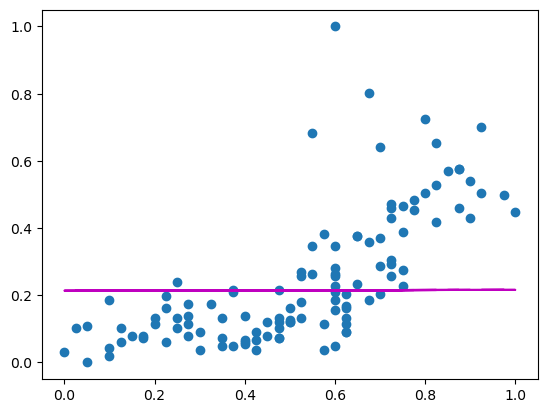

In [88]:
# 평가가 잘 이루어졌다 치고
# 모델이 잘 만들어졌으면 예측해보자
scaler_data = scaler_x.transform([[62]])
result = keras_model.predict(scaler_data) # 화씨 62도 인 경우 오존량은 얼마인가?
print(result) #[[34.834694]]  -> [[0.35750902]] -> [[0.21413347]]
# [[0.21413347]]는 오존값인데 이게 scaling 되어 있는 값이다.
# 그렇게 때문에 원래 오존값을 계산하려면 원복시켜야 된다.
real_result = scaler_t.inverse_transform(scaler_data)
print(real_result) #[[21.875]]
# 안에 랜덤적인 요소가 있기 때문에 결과값이 다 다르다.

# 결과가 나오긴 했지만 이게 정답인지 아닌지  알 수가 없다.

# 그림으로 확인해 보자
plt.scatter(x_data_norm , t_data_norm)

weight ,bias = output_layer.get_weights() # 원래 튜플값인데 튜플은 () 를 생략할 수 있다. 

plt.plot(x_data_norm, x_data_norm * weight +bias, color='m')

plt.show()

[[3.58411393]]


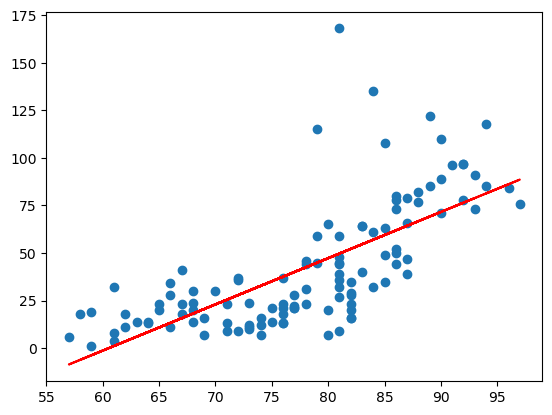

In [87]:
#그래서 잘 만들어진 라이브러리를 이용해서 정답에 가까운 값을 알아볼꺼다.
# 우리 모델과 비교해 볼꺼다.
# sklearn이라는 모듈이 있는데 이걸 이용하면 아주 쉽고 간단하게 모델으 생성
from sklearn import linear_model

#모델을 만들어보자
sklearn_model = linear_model.LinearRegression()

#학습 진행
sklearn_model.fit(x_data, t_data)

# 예측!
result_sklearn = sklearn_model.predict([[62]])
print(result_sklearn) #[[3.58411393]]

# 눈으로 확인해보자!! 산점도(scatter)와 점선(model)을 그리자
plt.scatter(x_data , t_data)

weight = sklearn_model.coef_ # _에 주의하자 꼭 써주야됌 
bias = sklearn_model.intercept_

plt.plot(x_data, x_data * weight +bias, color='r')

plt.show()

In [ ]:
# 이런 차이가 생기는 이유는
# 데이터의 전처리 때문에 그렇다.

# 우리가 이럭해야 하는 데이터의 전처리 과정은 3개다.
# (원래는 더 많고 약간 수학적 접근해야 한다.)
# 1. 결측치 처리
# 2. 이상치 처리 (이거 처리해야된다)
# 3. 정규화(Normalization) - 반드시 해야한다.
#    min-max scaling을 이용할 꺼다. 최대값 1 최소값 0 사이의 값으로 값을 변환

